<a href="https://colab.research.google.com/github/PL97/5271/blob/master/Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# We import the necessary packages 
from imutils import face_utils 
import numpy as np 
import argparse 
import imutils 
import dlib 
import cv2 
from google.colab.patches import cv2_imshow
import pandas as pd

In [18]:
# We are initializing the dlib's face detector (HOG-based) and then 
# creation of the facial landmark predictor 
detector = dlib.get_frontal_face_detector() 
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 

# We then load the input image, resize it, and convert it to grayscale 
images = cv2.imread("test2.jpg") 
images = imutils.resize(images, width = 500)
gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY) 

# We then detect faces in the grayscale image 
rects = detector(gray, 1) 

print(np.max(images))

255


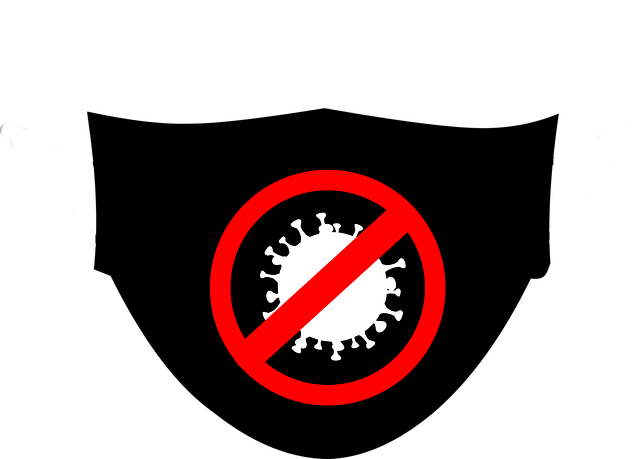

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 51]


In [19]:
result = images.copy()
mask = cv2.imread("mask/anti_covid.png", cv2.IMREAD_UNCHANGED)
src_pts = pd.read_csv("mask/anti_covid_err1.csv")
idxs = np.asarray(src_pts)[:, 0] -1
src_pts = np.asarray(src_pts)[:, 1:]
cv2_imshow(mask)
print(idxs)

In [20]:
print(rects)
print(images.shape)

rectangles[[(199, 80) (306, 187)]]
(358, 500, 3)


(358, 500, 4)
255
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


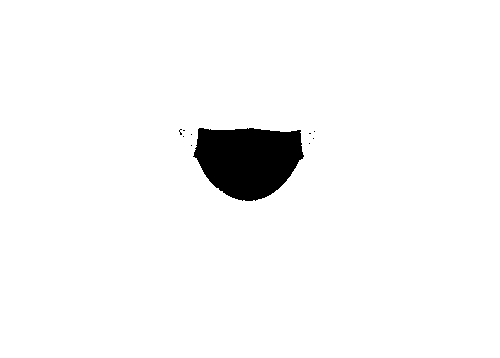

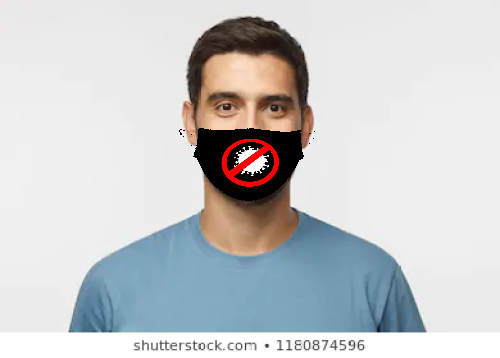

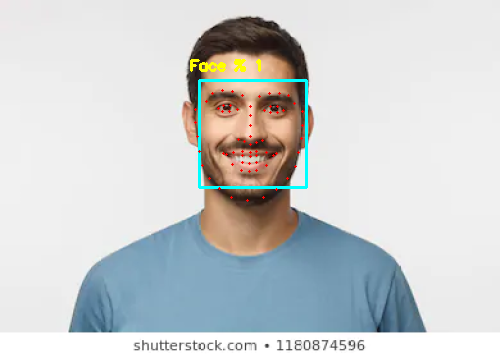

-1

In [21]:
# Now, job is to loop over the face detections 
for (i, rect) in enumerate(rects): 
	# We will determine the facial landmarks for the face region, then 
	# can convert the facial landmark (x, y)-coordinates to a NumPy array 
	shape = predictor(gray, rect) 
	shape = face_utils.shape_to_np(shape) 

	# We then convert dlib's rectangle to a OpenCV-style bounding box 
	# [i.e., (x, y, w, h)], then can draw the face bounding box 
	(x, y, w, h) = face_utils.rect_to_bb(rect) 
	cv2.rectangle(images, (x, y), (x + w, y + h), (255, 255, 0), 2) 

	# We then show the face number 
	cv2.putText(images, 'Face % {}'.format(i + 1), (x - 10, y - 10), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2) 

	# We then loop over the (x, y)-coordinates for the facial landmarks 
	# and draw them on the image 
	for (x, y) in shape: 
		cv2.circle(images, (x, y), 1, (0, 0, 255), -1)
	dst_pts = shape[idxs, :]
	M, _ = cv2.findHomography(src_pts, dst_pts)
 
	transformed_mask = cv2.warpPerspective(
		mask,
		M,
		(result.shape[1], result.shape[0]),
		None,
		cv2.INTER_LINEAR,
		cv2.BORDER_CONSTANT,
	)
	print(transformed_mask.shape)
	print(np.max(transformed_mask))
	# mask overlay
	temp_mask = np.sum(transformed_mask, axis=2)
	alpha_mask = (temp_mask > 0).astype(int)
	alpha_image = 1 - alpha_mask
	print(alpha_image)
	cv2_imshow(alpha_image*255) 

	ret = np.zeros_like(result)
	for c in range(0, 3):
		ret[:, :, c] = (
				alpha_mask * transformed_mask[:, :, c]
				+ alpha_image * result[:, :, c]
		)
	

# Now show the output image with the face detections as well as 
# facial landmarks 
cv2_imshow(ret) 
cv2_imshow(images) 
cv2.waitKey(0) 


# New Section